#04. PyTorch Custom Datasets Video Notebook

**Resources**:
* Book version of the course materials for 04: https://www.learnpytorch.io/04_pytorch_custom_datasets/

## 0. Importing PyTorch and Setting up Device Agnostic Code

In [ ]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [ ]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##1. Get Data

Our dataset is the subset of food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing images)

Our datasets starts with 3 classes of foof and only 10% of the images (75 training and 25 testing)

In [ ]:
import requests
import zipfile
from pathlib import Path

#Setup path to a datafolder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"{image_path} does not exists, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

#Download pizza, steak, sushi dataset
with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

with zipfile.ZipFile("/content/data/pizza_steak_sushi.zip", "r") as zip_ref:
  print("Extracting pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exists, creating one...
Extracting pizza, steak, sushi data...


##2. Becoming the one with the data

In [ ]:
import os
def walk_through_directories(dir_path):
  """Walkks through dir_path returning its content"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories  and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_directories(image_path)

There are 2 directories  and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories  and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories  and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories  and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories  and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories  and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories  and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories  and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories  and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [ ]:
#Setup train and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

##2.1 Visualizing and image

1. Get all of the image path
2. Pick a random image path using Python's random.choice()
3. Get the image class name using 'pathlib.Path.parent.stem'
4. Since we're working with images, let's  open the image with Python's PIL
5. We'll then show the image and print metadata

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

Random image path: data/pizza_steak_sushi/train/sushi/1221830.jpg
Image class: sushi
Image width and height: (512, 512)


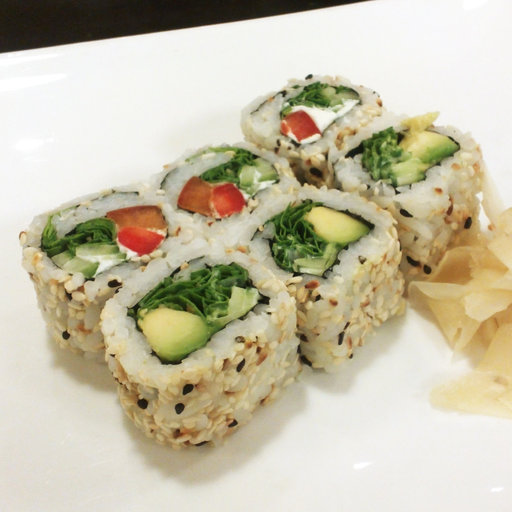

In [ ]:
import random
from PIL import Image

#Set seed
# random.seed(42)

#1. Get all images
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. Pick a random image
random_image = random.choice(image_path_list)

#3. Get the image class name
image_class = random_image.parent.stem

#4. Open the image
img = Image.open(random_image)

#5. Print the image metadata
print(f"Random image path: {random_image}")
print(f"Image class: {image_class}")
print(f"Image width and height: {img.size}")
img

(-0.5, 511.5, 511.5, -0.5)

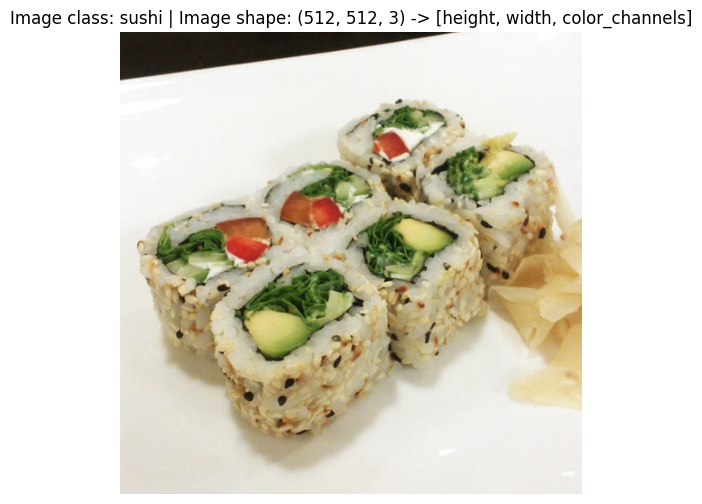

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Turn the image into an array
img_array = np.asarray(img)

#Plot the image with matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_array)
plt.title(f"Image class: {image_class} | Image shape: {img_array.shape} -> [height, width, color_channels]")
plt.axis(False)

## 3. Transforming data

Before we can use our image data with PyTorch
1. Turn your target data into tensors(in our case, numerical  representation of our images).
2. Turn into a 'torch.utils.data.Dataste' and subsequently a 'torch.utils.data.DataLoader' and 'DataLoader'

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

##3.1 Transforming data with torchvision.transforms

Transform helps you get your images ready to be used with model/perform data augmentations - https://pytorch.org/vision/main/transforms.html

In [ ]:
#Write a transform for image
data_transform = transforms.Compose([
    #Resize our images to 64*64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.1333, 0.1373, 0.1373,  ..., 0.9765, 0.9765, 0.9725],
         [0.1333, 0.1255, 0.1294,  ..., 0.9765, 0.9765, 0.9725],
         [0.1294, 0.1255, 0.1255,  ..., 0.9765, 0.9725, 0.9725],
         ...,
         [0.8863, 0.8784, 0.8824,  ..., 0.9529, 0.9529, 0.9412],
         [0.8863, 0.8863, 0.8863,  ..., 0.9373, 0.9412, 0.9373],
         [0.8863, 0.8902, 0.8824,  ..., 0.9373, 0.9373, 0.9373]],

        [[0.1176, 0.1137, 0.1137,  ..., 0.9765, 0.9725, 0.9686],
         [0.1137, 0.1098, 0.1059,  ..., 0.9765, 0.9686, 0.9647],
         [0.1098, 0.1098, 0.1059,  ..., 0.9686, 0.9686, 0.9686],
         ...,
         [0.8627, 0.8588, 0.8549,  ..., 0.9412, 0.9451, 0.9294],
         [0.8627, 0.8627, 0.8627,  ..., 0.9255, 0.9255, 0.9255],
         [0.8667, 0.8667, 0.8667,  ..., 0.9255, 0.9216, 0.9176]],

        [[0.0784, 0.0784, 0.0863,  ..., 0.9686, 0.9686, 0.9608],
         [0.0706, 0.0627, 0.0706,  ..., 0.9725, 0.9686, 0.9608],
         [0.0745, 0.0745, 0.0706,  ..., 0.9686, 0.9608, 0.

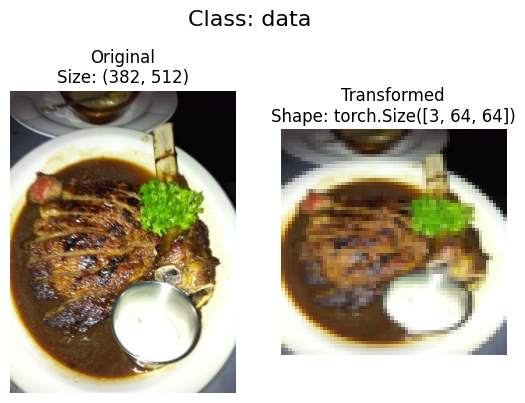

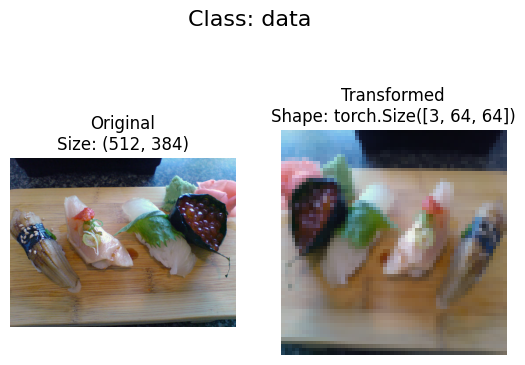

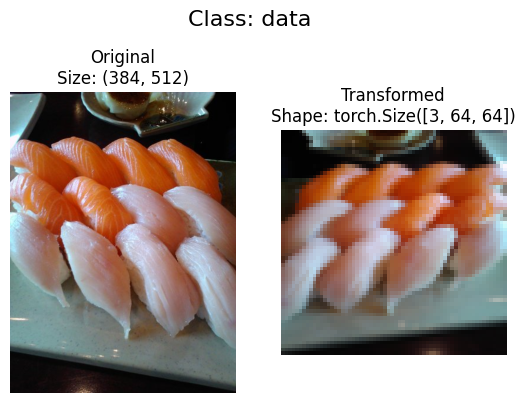

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """Selects random images from a path of images  and laods/transforms them then plots the orginal vs the transformed version"""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_paths in random_image_paths:
    with Image.open(image_paths) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      #Transform and plot target image
      transformed_image = transform(f)
      ax[1].imshow(transformed_image.permute(1,2,0))
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, data_transform, n=3, seed=42)

##4. Option 1:  Loading Image data using 'ImageFolder'

We can load image classification data using 'torchvision.datasets.ImageFolder' - https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

In [ ]:
#Use Imagefolder to create datasets
from torchvision.datasets import ImageFolder
train_data = ImageFolder(root=train_dir, transform=data_transform)
test_data = ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data



(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
#Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
#Get class names as dict
class_to_idx = train_data.class_to_idx
class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Index on the train_data datasets to get a single image and its label
img, label = train_data[0][0], train_data[0][1]
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [ ]:
class_names[label]

'pizza'

Image shape: torch.Size([3, 64, 64])
Image permute shape: torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

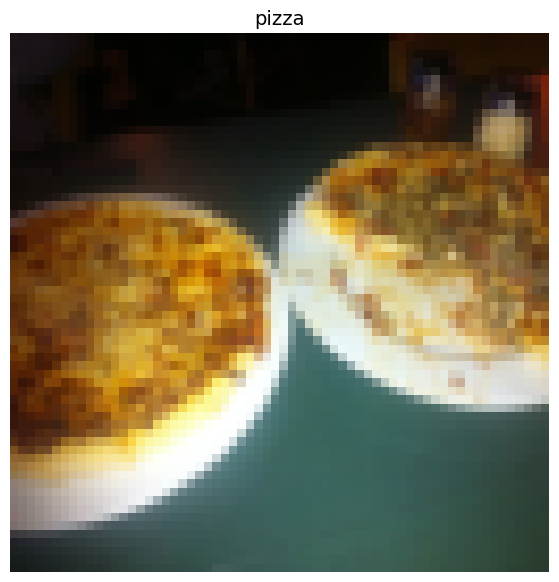

In [ ]:
# Rarrange the order of dimensions
img_permute = img.permute(1,2,0)

#Print out different shapes
print(f"Image shape: {img.shape}")
print(f"Image permute shape: {img_permute.shape}")

#Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=14)
plt.axis(False)

##4.1 Turn loaded images into DataLoaders

A dataset loader is going to help us turn our Dataset's into iterables and we can customise the batch_size so our model can see batch_size iamges at a time

In [ ]:
#Turn train and test datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, batch_size=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ede9131bfd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ede9131bfa0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))

#Batch size will now be 1
print(f"Image shape: {img.shape} -> batch size, color channel, height, width")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> batch size, color channel, height, width
Label shape: torch.Size([1])


##  5. Option 2: Loading Image data with a Custom Dataset

1. Want to be able to load images from file
2. Want to be able to get class names from the datasets
3. Want to be able to get classes as dictionary from the datsets

**Pros**
1. Can create a 'Dataset' out of almost anything
2. Not limited to Pytorch pre-built 'Dataset' functions

**Cons**
1. Even though you could create Datasets out of almost anything, it doesn't mean it will work
2. Using a custom Dataset often results in us writing more code, which could be prone to errors on performance issues

In [ ]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###5.1 Creating the Helper Function to get the claas names

In [ ]:
#Setup Path  for Target DIRECTORY
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target dictionary
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  "Finds the class folder names in a target directory"
  #1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if classes names could not be found
  if not classes:
    raise FileNotFoundError(f"Could not find any classes in {directory}... please check file structure")

  #3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###5.2 Create a custom 'Dataset' to replicate 'Imagefolder'

To create our custpm dataset we want to:

1. Subclass 'torch.utils.data.dataset'
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data
3. Create several attributes:
* paths - paths of our images
* transform - the transform we'd like to use
* classes - alist of the target device
* class_to_idx - a dict of the target classes map to integer labels
4. Create a function t 'load_images()', this funnction will open an image
5. Overwrite the '__len()__' method to return the length of our dataset
6. Overwrite the __getitem()__ method to return a given sample when passed an index

In [ ]:
#0. Write a custom dataset class
from torch.utils.data import Dataset

#1. Subclass torch.utils.data.dataset
class ImageFolderCustom(Dataset):
  #2. Imitialize the custom dataset
  def __init__(self, targ_dir: str,
               transform=None):
    #3. Create class attributes
    #Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    #Setup transforms
    self.transform = transform
    #Get the class names and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  #4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples"
    return len(self.paths)

  #6. Overwrite __getitem__()
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, Y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.stem
    class_idx = self.class_to_idx[class_name]

    #Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [ ]:
img, label = train_data[0]

In [ ]:
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [ ]:
#Create a transform
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
#Test out ImageFolder custom
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transform)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7ede913927d0>,
 <__main__.ImageFolderCustom at 0x7ede91392860>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
#Check for equality between original ImageFolder Dataset and ImageFolder Dataset
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True


###5.3 Create a function to display random images

1. Take in a 'Dataset' and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample images and plot them with matplotlib
5. Setup a matplotlib plot
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib(HWC)

In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool =True,
                          seed: int = None):
  #2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purpose, n shouldn't be larger than 10, setting to 10 and removing")

  #3. Set the seed
  if seed:
    random.seed(seed)

  #4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  #5. Setup plot
  plt.figure(figsize=(16, 8))

  #6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    #Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)


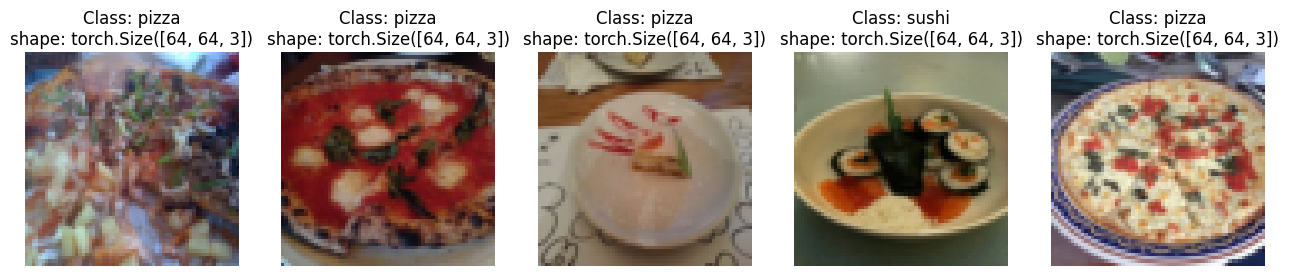

In [ ]:
display_random_images(train_data, n=5, classes=class_names, seed=None)

For display, purpose, n shouldn't be larger than 10, setting to 10 and removing


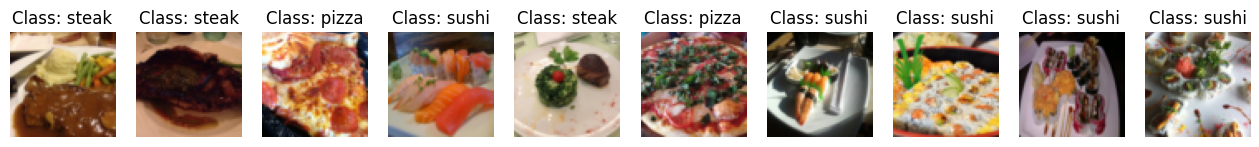

In [ ]:
# Display random images from the ImageFolder Dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=None)

### 5.4 Turn Custom loaded images into Dataloader's

In [ ]:
from torch.utils.data import DataLoader
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=32, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=32,num_workers=NUM_WORKERS, shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7ede911fad40>,
 <torch.utils.data.dataloader.DataLoader at 0x7ede913d7730>)

In [ ]:
#Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

#Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transform (data augmentation)

Data Augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this mean applying various image transformations to the training images

This practice hopefully results

Let's take a look a one particular type of data augmentation used to train PyTorch vision models to state of the art levels...

In [ ]:
from torchvision import disable_beta_transforms_warning
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/719108.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2540511.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1987407.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3837522.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg')]

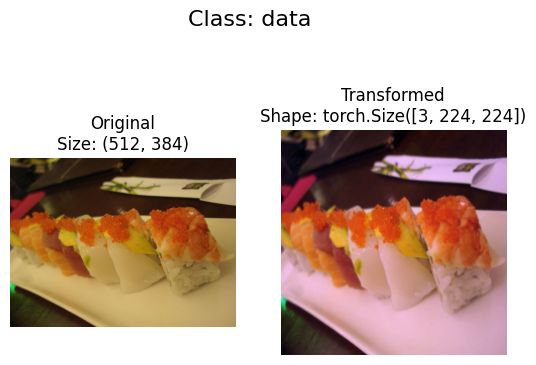

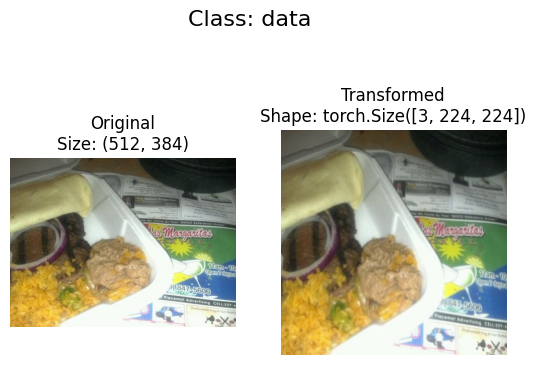

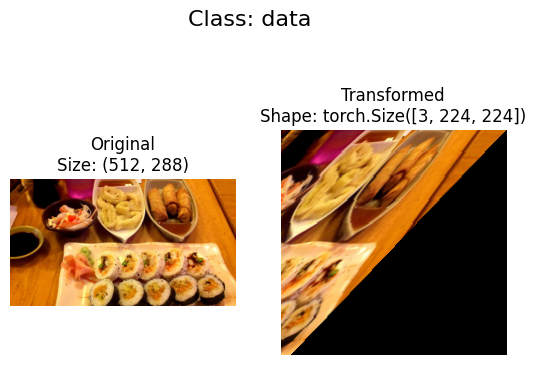

In [ ]:
#Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7. Model 0: TinyVGG without Data Augmentation

Let's replicate the tiny VGG architecture from the CNN Explainer website


### 7.1 Creating transforms and loading data for Model 0

In [ ]:
#Create simpele
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
#1. Load and Transform Data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                      transform=simple_transform)

#Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

#Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 7.2 Create TinyVGG model class

In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)

    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) #benefits from operator fusion

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 Try a Forwward pass on a single image (to test the model)

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# TRy a forward pass
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

### 7.4 Use torch.info to get an idea of the shapes going through our model

In [ ]:
#Install torchinfo
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Train and Test loop functions

* 'train_step()' takes in a model and dataloader and trains the model on the dataloader
* 'test_step()' takes in a model and dataloader and evaluate the model on the dataloader

In [ ]:
#Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer :torch.optim.Optimizer,
               device = device):
  #Put the model in the train mode
  model.train()

  #Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  #Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model(X)

    #2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimization zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculating accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  #Adjust metric to get the average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
#Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              device = device):
  #Put model in eval mode
  model.eval()

  #Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  #Turn on inference mode
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # 3. Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

      #Adjust metric to get the average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### 7.6 Creating a train() function to commbine train and test step

In [ ]:
from tqdm.auto import tqdm

#1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}


  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device
                                       )

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    #4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    #5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

    #6. Return the filled results at the end of the epochs
  return results

### 7.7 Train and Evaluate Model

In [ ]:
#Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set numebr of  epochs
NUM_EPOCHS = 5

#Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

#Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

#Start the timer
from timeit import default_timer as timer
start_time = timer()

#Train the model
model_0_results = train(model=model_0,
                  train_dataloader=train_dataloader_simple,
                  test_dataloader=test_dataloader_simple,
                  optimizer=optimizer,
                  loss_fn=loss_fn,
                  epochs=NUM_EPOCHS,
                  device=device)

#End the timer
end_time = timer()
total_time = end_time - start_time
print(f"Total training time: {total_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1078 | Train acc: 0.2578 | Test loss: 1.1362 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0846 | Train acc: 0.4258 | Test loss: 1.1622 | Test acc: 0.1979
Epoch: 2 | Train loss: 1.1153 | Train acc: 0.2930 | Test loss: 1.1695 | Test acc: 0.1979
Epoch: 3 | Train loss: 1.0991 | Train acc: 0.2891 | Test loss: 1.1341 | Test acc: 0.1979
Epoch: 4 | Train loss: 1.0989 | Train acc: 0.2930 | Test loss: 1.1434 | Test acc: 0.1979
Total training time: 8.774 seconds


In [ ]:
model_0_results

{'train_loss': [1.1078356206417084,
  1.0846449583768845,
  1.115255743265152,
  1.0990822315216064,
  1.0988788157701492],
 'train_acc': [0.2578125, 0.42578125, 0.29296875, 0.2890625, 0.29296875],
 'test_loss': [1.1362075010935466,
  1.162168264389038,
  1.1694660186767578,
  1.1341443459192913,
  1.1434194246927898],
 'test_acc': [0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666]}

### 7.8 Plot the loss curves of Model 0

A loss curve is a way of tracking youur model's progress over time

In [ ]:
#Get the model_0  results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary"""
  #Get the loss values of the results dict
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  #Get the accuracy values of the results dict
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  #Fig out how many epochs there were
  epochs = range(len(results["train_loss"]))

  #Setup a plot
  plt.figure(figsize=(15, 7))

  #Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_acc")
  plt.plot(epochs, test_accuracy, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

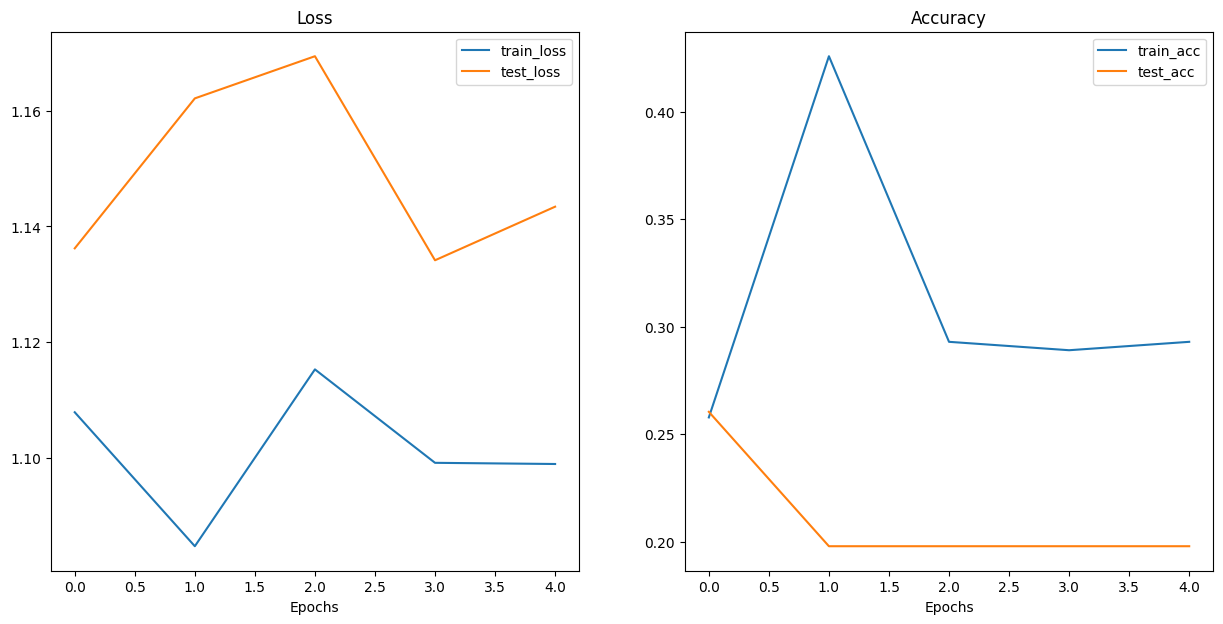

In [ ]:
plot_loss_curves(model_0_results)

##8. What should an ideal loss curve look like?

A loss curve is one of the way to troubleshoot a model

## 9. Model -1 TinyVGG with Data Augmentation

Now let's  try anotehr modelling this using the same model as before with some data augmentation


###9.1 Create transform with data augmentation


In [ ]:
#Create training transofrm with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

#Create testing transform
test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test Datatset's  and DataLoader's with data augmentation

In [ ]:
#Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                           transform=test_transform_simple)

In [ ]:
#Turn our Datasets
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                        batch_size = BATCH_SIZE,
                                        shuffle= True,
                                        num_workers=NUM_WORKERS)
test_dataloader_augmented = DataLoader(dataset = test_data_simple,
                                        batch_size = BATCH_SIZE,
                                        shuffle= False,
                                        num_workers=NUM_WORKERS)

### 9.3 Construct and train model 1

This time we will be using same model architecture except this time we've augmented the training data.

In [ ]:
#Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
#Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set numebr of  epochs
NUM_EPOCHS = 5

#Setup the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)

#Start the timer
from timeit import default_timer as timer
start_time = timer()

#Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        loss_fn = loss_fn,
                        optimizer=optimizer,
                        epochs = NUM_EPOCHS,
                        device = device)

#End the timer
end_time = timer()
total_time = end_time - start_time
print(f"Total training time: {total_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1076 | Train acc: 0.2500 | Test loss: 1.1062 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0791 | Train acc: 0.4258 | Test loss: 1.1388 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0810 | Train acc: 0.4258 | Test loss: 1.1696 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.1293 | Train acc: 0.3047 | Test loss: 1.1625 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.0900 | Train acc: 0.4258 | Test loss: 1.1482 | Test acc: 0.2604
Total training time: 10.044 seconds


In [ ]:
model_1_results

{'train_loss': [1.1075639426708221,
  1.0790705010294914,
  1.080969676375389,
  1.129259631037712,
  1.0900058448314667],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.106237252553304,
  1.138799786567688,
  1.1696368257204692,
  1.162528157234192,
  1.1482336521148682],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667]}

### 9.4 Plot the loss curve for model_1

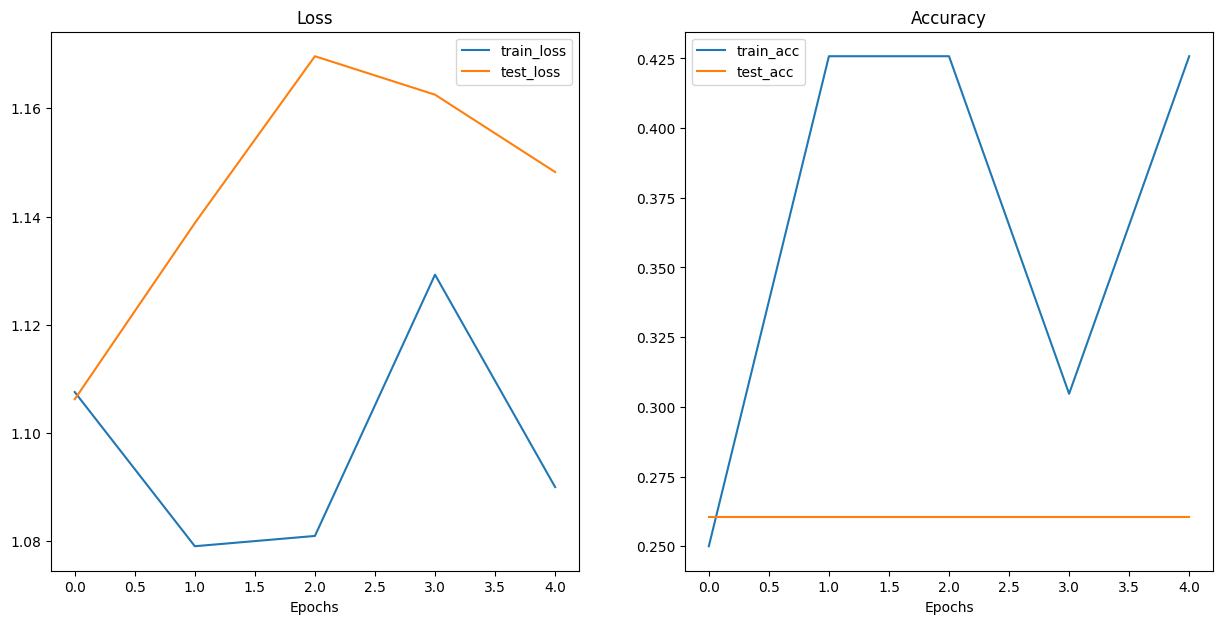

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare model results

After evaluating our modelling epxeriments on their own, it's important to compare them to each other

There's a few different ways to do this:
1. Hard coding (what we're doing)
2. PyTorch + Tensorboard - https://pytorch.org/docs/stable/tensorboard.html
3. Weights & Bias - https://wandb.ai/site
4. MLFlow - https://mlflow.org/

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084645,0.425781,1.162168,0.197917
2,1.115256,0.292969,1.169466,0.197917
3,1.099082,0.289062,1.134144,0.197917
4,1.098879,0.292969,1.143419,0.197917


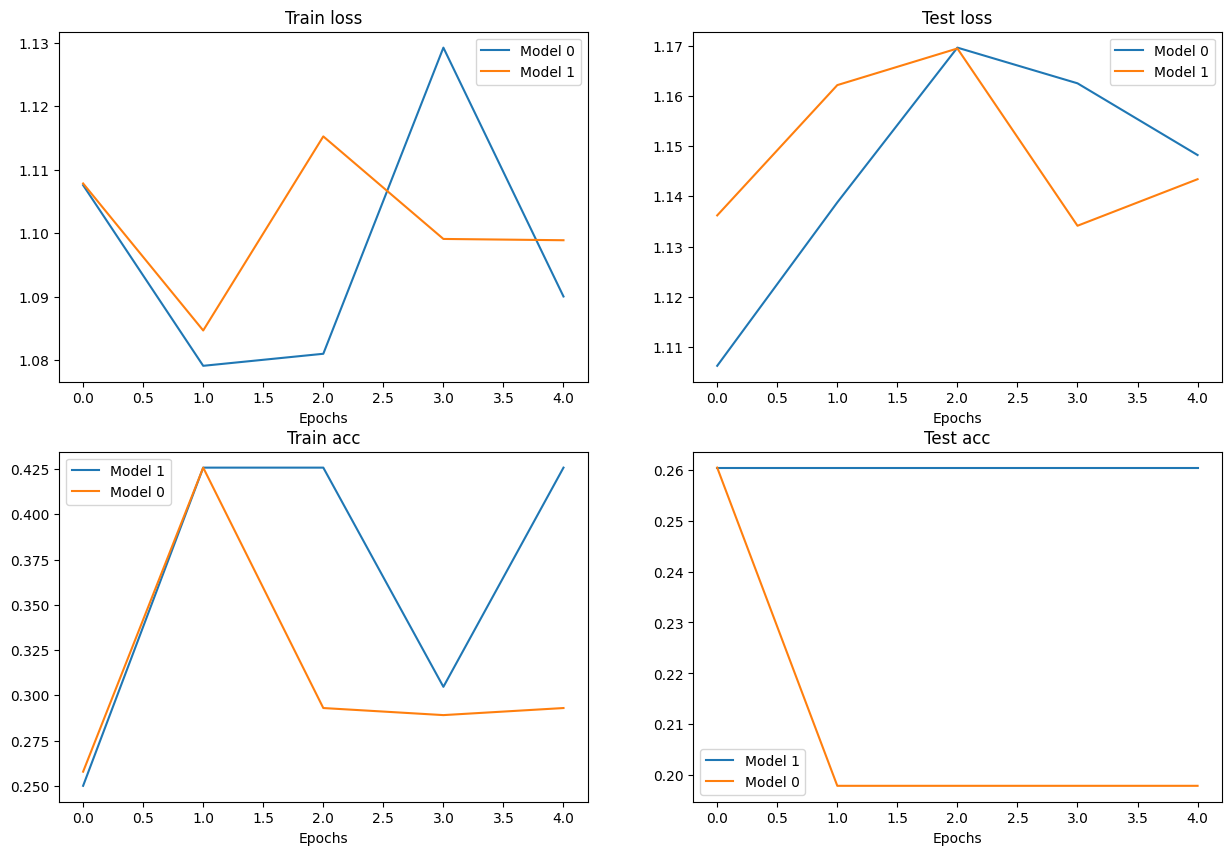

In [ ]:
# Setup a plot
plt.figure(figsize=(15,10))

#Get number of epochs
epochs = range(len(model_0_df))

#Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_1_df["train_loss"], label="Model 0")
plt.plot(epochs, model_0_df["train_loss"], label="Model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

#Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_1_df["test_loss"], label="Model 0")
plt.plot(epochs, model_0_df["test_loss"], label="Model 1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

#Plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

#Plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend()

## 11. Making a prediction on a custom image

Although we've trained a model on custom data.. how do you make a prediction on a sample /image noot in either creating dataset

In [ ]:
# Downlaod custom image
import requests

#Setup custom image path
custom_image_path = data_path/ "04-pizza-dad.jpeg"

image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi/04-pizza-dad.jpeg"

#Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from Github, need to use the "raw" file link
    request = requests.get(image_url)
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
  # image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi/04-pizza-dad.jpeg"
else:
  print(f"{custom_image_path} already exists")

### 11.1 Loading in a custom image with PyTorch

We have to ake sure our custom image is in the same format as the data our model was trained on

* In tensor form with datatype(torchfloat32)
* Of shape 64*64*3
* On the right device

We can  read an image into PyTorch using -
https://pytorch.org/vision/main/generated/torchvision.io.read_image.html

In [ ]:
import torchvision
#Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype})")

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image data

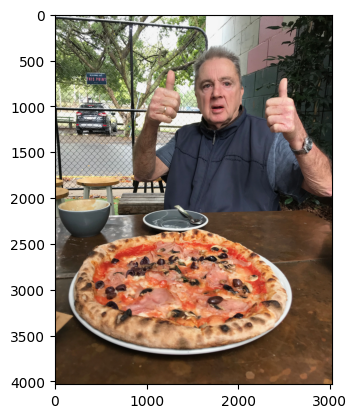

In [ ]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

### 11.2 Making a prediction on a custom image with a trained PyTorch model

In [ ]:
custom_image_uint8 = custom_image_uint8 / 255
print(custom_image_uint8)

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
#Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.unsqueeze(dim=0).to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x7620480 and 2560x3)

In [ ]:
#Load in the cistom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

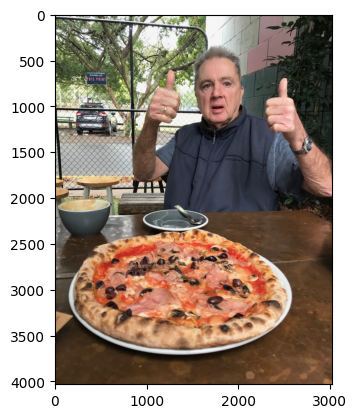

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))

In [ ]:
#Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.unsqueeze(dim=0).to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x7620480 and 2560x3)

In [ ]:
#Create a transform pipeline to resixe image
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)


#Print out the shape
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


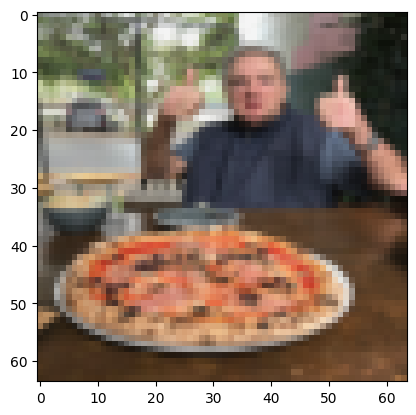

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [ ]:
model_1.eval()

with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

In [ ]:
custom_image_pred

tensor([[ 0.1188,  0.0341, -0.1488]], device='cuda:0')

Note, to make a predictiion on a custom image we had to :
* Load the image and turn it into a tensor
* Make sure the image wa sthe same datatype as the model (torch.float32)
* Make sure the image batch size... (1, 3, 64, 64) and image shape (3, 64, 64)
* Make sure the image was on the device as our model

In [ ]:
#Convert logits to prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3726, 0.3423, 0.2851]], device='cuda:0')

In [ ]:
#Convert prediction  prob -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_label

tensor([0], device='cuda:0')

In [ ]:
class_names[custom_image_pred_label]

'pizza'

### 11.3 Putting custom image prediction together: building a function

Ideal outcome:

A function where we pass an image path to and hae our model on that image and plot the image+prediction

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  #Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  #Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  #Make sure the model is on the target device
  model.to(device)

  #Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    target_image_pred = model(target_image.unsqueeze(dim=0).to(device))

  #Convert logits -> predictions probablities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  #Convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  #Plot the image alongside the prediction prob
  plt.imshow(target_image.squeeze().permute(1, 2, 0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max():.3f}"
  plt.title(title)
  plt.axis(False)


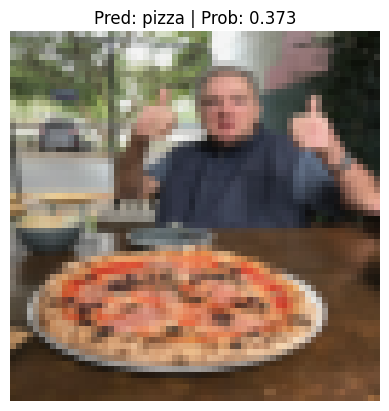

In [ ]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)